In [14]:
import sys
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
from itertools import chain
from matplotlib import pyplot as plt
from SPARQLWrapper import SPARQLWrapper, CSV

In [2]:
def get_all_metrics (payload):
    global count
    print(count)
    FAIR_checker_api = "https://fair-checker.france-bioinformatique.fr/api/check/metrics_all"
    try:
        response = requests.get(FAIR_checker_api, params=payload)
        print(payload)
        print(response.status_code)
        print("________________")
        count += 1
        return response.json(), response.status_code
    except requests.JSONDecodeError:
        status = 504
        print(payload)
        print(status)
        print("________________")
        return None, status

In [3]:
def get_metrics_from_result(assessment_result):
    return [item.get('metric') for item in assessment_result]

def get_scores_from_result(assessment_result):
    return [int(item.get('score')) for item in assessment_result]

# Paper

## Papers via DOI

### Paper assessment via DOI

In [4]:
%%script false --no-raise-error
date = "2023-03-29"
orkg_doi_df = pd.read_pickle("orkg_papers_"+date+".pkl")
orkg_doi_df

Couldn't find program: 'false'


In [5]:
%%script false --no-raise-error
# FAIR-Checker assessment for all ORKG papers with a valid doi
# Executing this approximately takes 1,505 minutes
# If you don't have the time, use the latest .pkl file :)
count = 0
assessment_results = orkg_doi_df['doi'].map(lambda x: get_all_metrics(payload={'url': 'https://doi.org/' + x}))
orkg_doi_df['FAIR_assessment'] = [aresult[0] for aresult in assessment_results]
orkg_doi_df['assessment_status_code'] = [aresult[1] for aresult in assessment_results]
orkg_doi_df.to_pickle("./orkg_doi_df_FAIRChecker_assessment"+date+".pkl")
orkg_doi_df

Couldn't find program: 'false'


### Paper evaluation via DOI + visualisations

In [6]:
# using the .pkl from the doi paper assessments
# only keeping successful assessments
orkg_doi_df = pd.read_pickle("orkg_doi_df_FAIRChecker_assessment2023-03-29.pkl")
print(orkg_doi_df["assessment_status_code"].value_counts())
orkg_doi_df = orkg_doi_df[orkg_doi_df["assessment_status_code"] == 200]
orkg_doi_df = orkg_doi_df.drop(labels=["assessment_status_code"], axis=1)
orkg_doi_df.reset_index(drop=True)

200    4770
504     150
500      29
Name: assessment_status_code, dtype: int64


,paper,doi,research_field_label,FAIR_assessment
0,http://orkg.org/orkg/resource/R1004,10.1186/s12866-016-0676-9,Bioinformatics,"[{'metric': 'F1A', 'score': '2', 'target_uri':..."
1,http://orkg.org/orkg/resource/R107618,10.1007/s11423-020-09885-z,Learner-Interface Interaction,"[{'metric': 'F1A', 'score': '2', 'target_uri':..."
2,http://orkg.org/orkg/resource/R107663,10.1111/1467-8535.00213,Learner-Interface Interaction,"[{'metric': 'F1A', 'score': '0', 'target_uri':..."
3,http://orkg.org/orkg/resource/R107834,10.32870/Ap.v12n2.1910,Learner-Interface Interaction,"[{'metric': 'F1A', 'score': '2', 'target_uri':..."
4,http://orkg.org/orkg/resource/R107843,10.19173/irrodl.v4i2.149,Learner-Interface Interaction,"[{'metric': 'F1A', 'score': '2', 'target_uri':..."
...,...,...,...,...
4765,http://orkg.org/orkg/resource/R8441,10.1016/j.jbiotec.2013.12.009,Systems Biology,"[{'metric': 'F1A', 'score': '2', 'target_uri':..."
4766,http://orkg.org/orkg/resource/R9154,10.1073/pnas.1913007117,Life Sciences,"[{'metric': 'F1A', 'score': '0', 'target_uri':..."
4767,http://orkg.org/orkg/resource/R9190,10.1007/978-3-319-54064-1_3,Biotechnology,"[{'metric': 'F1A', 'score': '2', 'target_uri':..."
4768,http://orkg.org/orkg/resource/R9295,10.1038/nprot.2016.182,Biotechnology,"[{'metric': 'F1A', 'score': '2', 'target_uri':..."


In [7]:
assessment_df = pd.DataFrame()

papers = list(chain.from_iterable([[x]*11 for x in orkg_doi_df['paper']]))
assessment_df['paper'] = papers

research_fields = list(chain.from_iterable([[x]*11 for x in orkg_doi_df['research_field_label']]))
assessment_df['research_field'] = research_fields

dois = list(chain.from_iterable([[x]*11 for x in orkg_doi_df['doi']]))
assessment_df['doi'] = dois

metrics = list(chain.from_iterable([get_metrics_from_result(assessment_result=x) for x in orkg_doi_df['FAIR_assessment']]))
assessment_df['metric'] = metrics

scores = list(chain.from_iterable([get_scores_from_result(assessment_result=x) for x in orkg_doi_df['FAIR_assessment']]))
assessment_df['score'] = scores

assessment_df

,paper,research_field,doi,metric,score
0,http://orkg.org/orkg/resource/R1004,Bioinformatics,10.1186/s12866-016-0676-9,F1A,2
1,http://orkg.org/orkg/resource/R1004,Bioinformatics,10.1186/s12866-016-0676-9,F1B,0
2,http://orkg.org/orkg/resource/R1004,Bioinformatics,10.1186/s12866-016-0676-9,F2A,2
3,http://orkg.org/orkg/resource/R1004,Bioinformatics,10.1186/s12866-016-0676-9,F2B,2
4,http://orkg.org/orkg/resource/R1004,Bioinformatics,10.1186/s12866-016-0676-9,A1.1,2
...,...,...,...,...,...
52465,http://orkg.org/orkg/resource/R9639,Computer Sciences,10.1007/978-3-030-30760-8_18,I2,2
52466,http://orkg.org/orkg/resource/R9639,Computer Sciences,10.1007/978-3-030-30760-8_18,I3,0
52467,http://orkg.org/orkg/resource/R9639,Computer Sciences,10.1007/978-3-030-30760-8_18,R1.1,0
52468,http://orkg.org/orkg/resource/R9639,Computer Sciences,10.1007/978-3-030-30760-8_18,R1.2,0


In [8]:
aggregate_funcs = {'research_field': 'first', 'doi': 'first', 'score': 'sum'}
total_score_df = assessment_df.groupby('paper', as_index=False).agg(aggregate_funcs)
total_score_df

,paper,research_field,doi,score
0,http://orkg.org/orkg/resource/R1004,Bioinformatics,10.1186/s12866-016-0676-9,18
1,http://orkg.org/orkg/resource/R107618,Learner-Interface Interaction,10.1007/s11423-020-09885-z,16
2,http://orkg.org/orkg/resource/R107663,Learner-Interface Interaction,10.1111/1467-8535.00213,2
3,http://orkg.org/orkg/resource/R107834,Learner-Interface Interaction,10.32870/Ap.v12n2.1910,4
4,http://orkg.org/orkg/resource/R107843,Learner-Interface Interaction,10.19173/irrodl.v4i2.149,4
...,...,...,...,...
4765,http://orkg.org/orkg/resource/R8441,Systems Biology,10.1016/j.jbiotec.2013.12.009,4
4766,http://orkg.org/orkg/resource/R9154,Life Sciences,10.1073/pnas.1913007117,2
4767,http://orkg.org/orkg/resource/R9190,Biotechnology,10.1007/978-3-319-54064-1_3,14
4768,http://orkg.org/orkg/resource/R9295,Biotechnology,10.1038/nprot.2016.182,16


In [9]:
print(total_score_df["score"].mean())
print(total_score_df["score"].median())
# possible max = 22
print(total_score_df["score"].max())
print(total_score_df[total_score_df["score"]==20])
# possible min = 0
print(total_score_df["score"].min())

6.351991614255765
4.0
20
                                     paper research_field  \
341  http://orkg.org/orkg/resource/R159706        Science   

                      doi  score  
341  10.5281/ZENODO.59011     20  
2


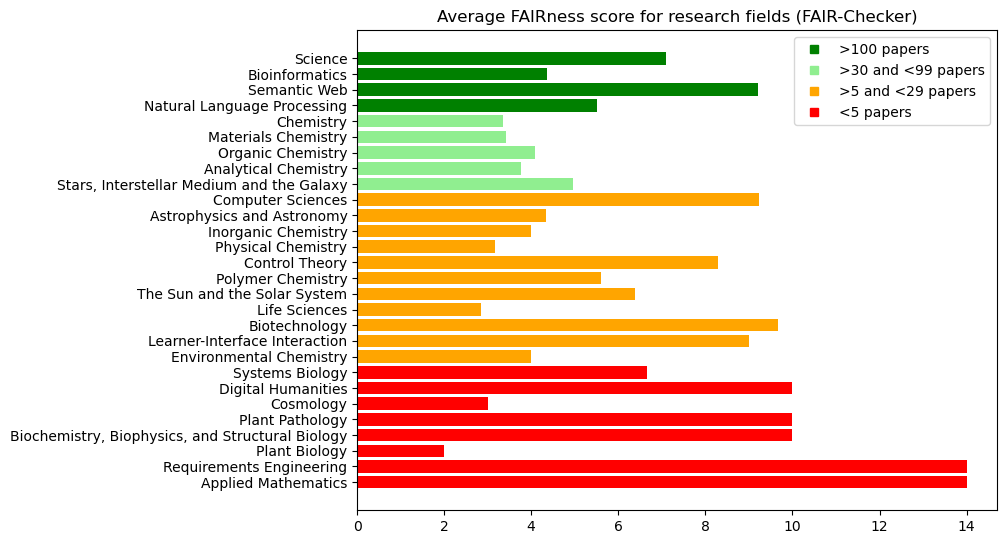

In [26]:
eval1_df = total_score_df.groupby("research_field").agg({"score": "sum"})
eval1_df["counts"] = total_score_df["research_field"].value_counts()
eval1_df = eval1_df.sort_values("counts")
eval1_df["avg_score"] = eval1_df["score"] / eval1_df["counts"]
eval1_df = eval1_df.drop(labels=["score"], axis=1)
eval1_df = eval1_df.reset_index()

plot = plt.figure()
ax = plot.add_axes([0,0,1,1])
fields = eval1_df['research_field']
avg_scores = eval1_df['avg_score']
counts_color = [{p<5: 'red', 5<=p<30: 'orange', 30<=p<=100: 'lightgreen', p>100: 'green'}[True] for p in eval1_df["counts"]]
ax.barh(fields, avg_scores, color=counts_color)
leg_red = mlines.Line2D([], [], color="red", marker="s", ls='', label="<5 papers")
leg_orange = mlines.Line2D([], [], color="orange", marker="s", ls='', label=">5 and <29 papers")
leg_lightgreen = mlines.Line2D([], [], color="lightgreen", marker="s", ls='', label=">30 and <99 papers")
leg_green = mlines.Line2D([], [], color="green", marker="s", ls='', label=">100 papers")
plt.legend(handles=[leg_green, leg_lightgreen, leg_orange, leg_red])
plt.title("Average FAIRness score for research fields (FAIR-Checker)")
plt.show()

In [27]:
def get_principle_from_metric(metric):
    if metric.startswith('F'):
        return 'findable'
    elif metric.startswith('A'):
        return 'accessible'
    elif metric.startswith('I'):
        return 'interoperable'
    else:
        return 'reusable'

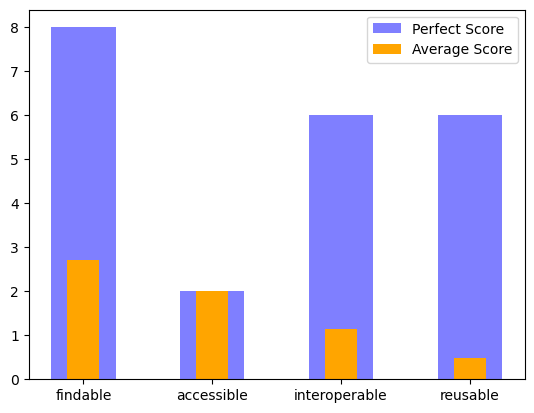

In [28]:
# max scores: F = 8, A = 2, I = 6, R = 6
principle_assessment_df = assessment_df
principle_assessment_df['principle'] = [get_principle_from_metric(x) for x in principle_assessment_df['metric']]

aggregate_funcs = {'score': 'sum', 'principle': 'first'}
principle_assessment_df = principle_assessment_df.groupby(['principle'], as_index=False).agg(aggregate_funcs)
principle_assessment_df['avg_metric_score'] = principle_assessment_df['score']/len(orkg_doi_df)

principle_assessment_df['principle'] = pd.Categorical(principle_assessment_df['principle'], ['findable', 'accessible', 'interoperable', 'reusable'])
principle_assessment_df = principle_assessment_df.sort_values('principle')

#plotting
width = 0.5
perfect_scores = [8, 2, 6, 6]
actual_scores = principle_assessment_df['avg_metric_score']
indices = np.arange(len(perfect_scores))

plt.bar(indices, perfect_scores, width=width, color='b', alpha=0.5, label='Perfect Score')
plt.bar([i for i in indices], actual_scores, width=0.5*width, color='orange', label='Average Score')
plt.xticks(indices, principle_assessment_df['principle'] )
plt.legend()
plt.show()

## Paper evaluation via ORKG resource URL

In [ ]:
orkg_url_df = pd.read_csv("paper_query_result_2023-03-29.csv", encoding="ISO-8859-1")
orkg_url_df = orkg_url_df[["paper", "paper_title", "url", "research_field_label"]]
orkg_url_df = orkg_url_df.groupby("paper").agg({"paper_title": "first", "url": "first", "research_field_label": "first"})
orkg_url_df

,paper_title,url,research_field_label
paper,,,
http://orkg.org/orkg/resource/R1004,"A semi-automated, KNIME-based workflow for bio...",None,Bioinformatics
http://orkg.org/orkg/resource/R107618,Instructional interfaceâs blueprint for guid...,None,Learner-Interface Interaction
http://orkg.org/orkg/resource/R107663,Dimensions of transactional distance in the wo...,None,Learner-Interface Interaction
http://orkg.org/orkg/resource/R107834,The future of learner-interface interaction. A...,http://www.udgvirtual.udg.mx/apertura/index.ph...,Learner-Interface Interaction
http://orkg.org/orkg/resource/R107843,Getting the Mix Right Again: An updated and th...,http://www.irrodl.org/index.php/irrodl/article...,Learner-Interface Interaction
...,...,...,...
http://orkg.org/orkg/resource/R8441,Investigating the feasibility of scale up and ...,None,Systems Biology
http://orkg.org/orkg/resource/R9154,Recent responses to climate change reveal the ...,None,Life Sciences
http://orkg.org/orkg/resource/R9190,Sequencing Techniques,None,Biotechnology


## Paper evaluation via standard URL

# Comparisons

## Comparisons evaluation via DOI

## Comparisons evaluation via URL

# Resources